# Spotify Playlist Audio Castomizer 

## >>> Select any Spotify Playlist >>> Sort & Filter according to your personal preferences!  

## Example with custom made Playlist: ' My Workout Playlist ' & Detailed Audio Analysis


Get More info about Tracks Audio Features:  "https://developer.spotify.com/"
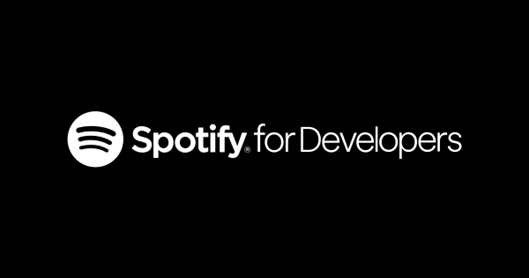

### First: open a Spotify & Spotify for Developers account!

In [75]:
# import everything needed for the program & analysis
import spotipy
import time 
from spotipy.oauth2 import SpotifyOAuth
import requests
import matplotlib
import pandas as pd 
import numpy as np
import json 
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt 
import os

In [70]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

secrets = get_keys(os.getcwd() + '\\.SECRETS\\stuffs.json')
CLIENT_ID = secrets['CLIENT_ID']
CLIENT_SECRET = secrets['CLIENT_SECRET']

In [71]:
#Authentication - without user
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

### Selecting a Playlist on Spotify of any size (it can even be your own Playlist) & getting the features

In [72]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZF1DX76Wlfdnj7AP"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
#print(playlist_URI)
tracks = sp.playlist_tracks(playlist_URI)
track_uris = [x["track"]["uri"] for x in tracks["items"]]
while tracks['next']:
    tracks = sp.next(tracks)
#print(track_uris)

In [ ]:
# initial lenght of a playlist (we are limiting the playlist on 100)
len(track_uris)

100

In [ ]:
# here are the Spotiy Audio Features for the first song! 
# Find out more about each feature (e.g. acousticness) on 'Spotify for Developers' page
sp.audio_features(track_uris[0])[0]

{'danceability': 0.621,
 'energy': 0.782,
 'key': 2,
 'loudness': -5.548,
 'mode': 1,
 'speechiness': 0.044,
 'acousticness': 0.0125,
 'instrumentalness': 0.033,
 'liveness': 0.23,
 'valence': 0.55,
 'tempo': 128.033,
 'type': 'audio_features',
 'id': '2tTmW7RDtMQtBk7m2rYeSw',
 'uri': 'spotify:track:2tTmW7RDtMQtBk7m2rYeSw',
 'track_href': 'https://api.spotify.com/v1/tracks/2tTmW7RDtMQtBk7m2rYeSw',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/2tTmW7RDtMQtBk7m2rYeSw',
 'duration_ms': 198938,
 'time_signature': 4}

In [ ]:
# General loop for getting more important data (track_name, artist_name, album etc) if you are interested just print it out :)

track_names = {} # dict - track uri to track name
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]
    #print(track_uri)
    #Track name
    track_name = track["track"]["name"]
    track_names[track_uri] = track_name
    #print(track_name)
    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)
    #print(artist_info)
    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]
    #print(artist_genres)
    #Album
    album = track["track"]["album"]["name"]
    #print(album)
    #Popularity of the track
    track_pop = track["track"]["popularity"]
    #print(track_pop)

In [74]:

# We want a dataframe containing all the features of each song in playlist (before we start sorting & filtering)
frames = []
track_name_lst = []
for track in sp.playlist_tracks(playlist_URI)["items"]:
    track_uri = track["track"]["uri"]
    track_features = sp.audio_features(track_uri)[0]
    #print(len(track_features))
    # if it contains all the data
    if not track_features:
        continue
    track_name_lst.append(track_names.get(track_uri))
    # creating a dataframe
    track_features_df  = pd.DataFrame(track_features, index=[0]).T
    #print(track_features_df)
    frames.append(track_features_df)
#print(frames) 

result = pd.concat(frames, axis=1).T.reset_index(drop = True)
result

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.68,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.543,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
1,0.831,0.554,1,-9.998,0,0.218,0.161,0.000061,0.152,0.396,140.026,audio_features,7hU3IHwjX150XLoTVmjD0q,spotify:track:7hU3IHwjX150XLoTVmjD0q,https://api.spotify.com/v1/tracks/7hU3IHwjX150...,https://api.spotify.com/v1/audio-analysis/7hU3...,168228,4
2,0.898,0.759,7,-4.942,1,0.114,0.227,0.00102,0.104,0.24,127.966,audio_features,0FRavXSn6XmeItbuJR3VrR,spotify:track:0FRavXSn6XmeItbuJR3VrR,https://api.spotify.com/v1/tracks/0FRavXSn6Xme...,https://api.spotify.com/v1/audio-analysis/0FRa...,180152,4
3,0.745,0.65,2,-11.814,1,0.346,0.0451,0.00758,0.111,0.386,144.047,audio_features,5vUnjhBzRJJIAOJPde6zDx,spotify:track:5vUnjhBzRJJIAOJPde6zDx,https://api.spotify.com/v1/tracks/5vUnjhBzRJJI...,https://api.spotify.com/v1/audio-analysis/5vUn...,152137,4
4,0.593,0.503,8,-6.725,0,0.22,0.293,0,0.405,0.71,178.781,audio_features,1SC5rEoYDGUK4NfG82494W,spotify:track:1SC5rEoYDGUK4NfG82494W,https://api.spotify.com/v1/tracks/1SC5rEoYDGUK...,https://api.spotify.com/v1/audio-analysis/1SC5...,137704,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.688,0.725,2,-7.806,1,0.044,0.0195,0.000008,0.0726,0.225,104.006,audio_features,5x4vgABKiGp4Vg7ZyFRxhn,spotify:track:5x4vgABKiGp4Vg7ZyFRxhn,https://api.spotify.com/v1/tracks/5x4vgABKiGp4...,https://api.spotify.com/v1/audio-analysis/5x4v...,163373,4
96,0.789,0.536,6,-6.862,1,0.242,0.41,0,0.129,0.437,81.039,audio_features,18vXApRmJSgQ6wG2ll9AOg,spotify:track:18vXApRmJSgQ6wG2ll9AOg,https://api.spotify.com/v1/tracks/18vXApRmJSgQ...,https://api.spotify.com/v1/audio-analysis/18vX...,165926,4
97,0.773,0.422,1,-4.572,0,0.187,0.00783,0.00693,0.129,0.488,77.502,audio_features,3XOalgusokruzA5ZBA2Qcb,spotify:track:3XOalgusokruzA5ZBA2Qcb,https://api.spotify.com/v1/tracks/3XOalgusokru...,https://api.spotify.com/v1/audio-analysis/3XOa...,136267,1
98,0.56,0.973,4,-2.389,1,0.086,0.000529,0.53,0.155,0.0749,159.976,audio_features,3jMeoTAxDrZfkVxMmWcWCg,spotify:track:3jMeoTAxDrZfkVxMmWcWCg,https://api.spotify.com/v1/tracks/3jMeoTAxDrZf...,https://api.spotify.com/v1/audio-analysis/3jMe...,150250,4


In [ ]:
result.shape

(100, 18)

In [ ]:
result['id']

0     2tTmW7RDtMQtBk7m2rYeSw
1     4uUG5RXrOk84mYEfFvj3cK
2     6Sq7ltF9Qa7SNFBsV5Cogx
3     3LtpKP5abr2qqjunvjlX5i
4     79HZAZNnOE97rb2hnI0XQr
               ...          
95    0siYMEsGrzzzlWLXK5zJfS
96    3AzjcOeAmA57TIOr9zF1ZW
97    1kwHrBWAlucOE57lWugotk
98    46nvQpUDsxpS08UTFOeKTA
99    1M8t1j3Kv2qp97bdq5q4Vl
Name: id, Length: 100, dtype: object

In [47]:
# dropping the extra columns
ids = result['id']
result_key = result.drop(result.iloc[:, 11:],axis=1)
track_name_df = pd.DataFrame(track_name_lst, columns=['song'])
# adding song names   
# result_key['song'] = track_name_df   
result_key['id'] = ids

# reordering
new_cols = ["id", "danceability","energy","key","loudness","mode","speechiness",
            "acousticness","instrumentalness","liveness","valence","tempo"] 
result_key = result_key[new_cols]
# result_key.set_index('song', inplace=True)
result_key.set_index('id', inplace=True)
result_key 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
id,,,,,,,,,,,
2tTmW7RDtMQtBk7m2rYeSw,0.621,0.782,2,-5.548,1,0.044,0.0125,0.033,0.23,0.55,128.033
4uUG5RXrOk84mYEfFvj3cK,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.04
6Sq7ltF9Qa7SNFBsV5Cogx,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005
3LtpKP5abr2qqjunvjlX5i,0.911,0.573,6,-7.43,1,0.288,0.38,0,0.403,0.972,140.04
79HZAZNnOE97rb2hnI0XQr,0.834,0.828,11,-2.657,0,0.0452,0.21,0.000006,0.103,0.58,102.019
...,...,...,...,...,...,...,...,...,...,...,...
0siYMEsGrzzzlWLXK5zJfS,0.671,0.782,6,-4.593,1,0.0341,0.0142,0.00221,0.333,0.618,123.989
3AzjcOeAmA57TIOr9zF1ZW,0.647,0.844,0,-3.756,1,0.0457,0.0137,0.000658,0.102,0.746,146.967
1kwHrBWAlucOE57lWugotk,0.677,0.804,1,-5.337,0,0.0677,0.0818,0.000019,0.158,0.41,122.111


In [48]:
index = result_key.index

In [49]:
list(index.array)

['2tTmW7RDtMQtBk7m2rYeSw',
 '4uUG5RXrOk84mYEfFvj3cK',
 '6Sq7ltF9Qa7SNFBsV5Cogx',
 '3LtpKP5abr2qqjunvjlX5i',
 '79HZAZNnOE97rb2hnI0XQr',
 '3F5CgOj3wFlRv51JsHbxhe',
 '4zN21mbAuaD0WqtmaTZZeP',
 '0hquQWY3xvYqN4qtiquniF',
 '5QO79kh1waicV47BqGRL3g',
 '27ZZdyTSQWI7Cug2d2PkqV',
 '6DoL1yYIwEW7VZMRaJhoJI',
 '7fZBQnc0zXwVybgCIrQQil',
 '1IHWl5LamUGEuP4ozKQSXZ',
 '6wtZPYBIXUvCpXwVjMCJBf',
 '5fwSHlTEWpluwOM0Sxnh5k',
 '3rb0tMq42WfggucPm0HHkA',
 '18asYwWugKjjsihZ0YvRxO',
 '27NovPIUIRrOZoCHxABJwK',
 '1bgKMxPQU7JIZEhNsM1vFs',
 '0skYUMpS0AcbpjcGsAbRGj',
 '41oY4WCTj5kccfesTVFnvN',
 '2BcMwX1MPV6ZHP4tUT9uq6',
 '20on25jryn53hWghthWWW3',
 '0bI7K9Becu2dtXK1Q3cZNB',
 '3Vi5XqYrmQgOYBajMWSvCi',
 '7MIhUdNJtaOnDmC5nBC1fb',
 '7FIWs0pqAYbP91WWM0vlTQ',
 '4jPy3l0RUwlUI9T5XHBW2m',
 '63WuQOXohQIxOxIFA2K7bR',
 '1RF02Cf80mTaeNXG2P2boR',
 '65OVbaJR5O1RmwOQx0875b',
 '79s5XnCN4TJKTVMSmOx8Ep',
 '0fX4oNGBWO3dSGUZcVdVV2',
 '3Z7CaxQkqbIs1rewKi6v4W',
 '47EiUVwUp4C9fGccaPuUCS',
 '2KukL7UlQ8TdvpaA7bY3ZJ',
 '1SC5rEoYDGUK4NfG82494W',
 

In [50]:
#result_key.info() # -> from object to float
result_key = result_key.astype(float)
# checking if there are multiple stronger correlations between cetrain paramaters
result_key.corr().style.background_gradient()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.248282,0.123719,-0.115103,-0.112338,0.124875,0.124058,-0.048900,-0.084022,0.157118,-0.097009
energy,-0.248282,1.000000,-0.015500,0.569114,0.028718,-0.471329,-0.253303,0.215341,0.047069,0.407371,-0.044833
key,0.123719,-0.015500,1.000000,0.028375,-0.295103,0.052123,0.035975,0.121786,0.128953,0.104554,0.114996
loudness,-0.115103,0.569114,0.028375,1.000000,-0.036716,-0.310808,-0.263096,-0.181241,0.132439,0.264608,-0.085698
mode,-0.112338,0.028718,-0.295103,-0.036716,1.000000,0.198130,-0.012570,0.014044,-0.172122,-0.069946,0.070161
speechiness,0.124875,-0.471329,0.052123,-0.310808,0.198130,1.000000,0.077172,-0.108104,-0.130603,-0.152570,0.289538
acousticness,0.124058,-0.253303,0.035975,-0.263096,-0.012570,0.077172,1.000000,-0.115720,-0.021341,0.080602,-0.047124
instrumentalness,-0.048900,0.215341,0.121786,-0.181241,0.014044,-0.108104,-0.115720,1.000000,-0.044532,0.020213,0.047661
liveness,-0.084022,0.047069,0.128953,0.132439,-0.172122,-0.130603,-0.021341,-0.044532,1.000000,0.096672,-0.058051
valence,0.157118,0.407371,0.104554,0.264608,-0.069946,-0.152570,0.080602,0.020213,0.096672,1.000000,0.071750


In [51]:
# if there are not too many high correlations we can move if we want the paramaters with relativly high corr
# and additionally 
# mode, key & speechiness (because it doesn't give us much relevant information for this example of Workout playlist)  
result_key_drop = result_key.drop(columns=['key', 'mode','speechiness'])
result_key_drop.corr().style.background_gradient()
# much clearer and simpler for our analysis

,danceability,energy,loudness,acousticness,instrumentalness,liveness,valence,tempo
danceability,1.000000,-0.248282,-0.115103,0.124058,-0.048900,-0.084022,0.157118,-0.097009
energy,-0.248282,1.000000,0.569114,-0.253303,0.215341,0.047069,0.407371,-0.044833
loudness,-0.115103,0.569114,1.000000,-0.263096,-0.181241,0.132439,0.264608,-0.085698
acousticness,0.124058,-0.253303,-0.263096,1.000000,-0.115720,-0.021341,0.080602,-0.047124
instrumentalness,-0.048900,0.215341,-0.181241,-0.115720,1.000000,-0.044532,0.020213,0.047661
liveness,-0.084022,0.047069,0.132439,-0.021341,-0.044532,1.000000,0.096672,-0.058051
valence,0.157118,0.407371,0.264608,0.080602,0.020213,0.096672,1.000000,0.071750
tempo,-0.097009,-0.044833,-0.085698,-0.047124,0.047661,-0.058051,0.071750,1.000000


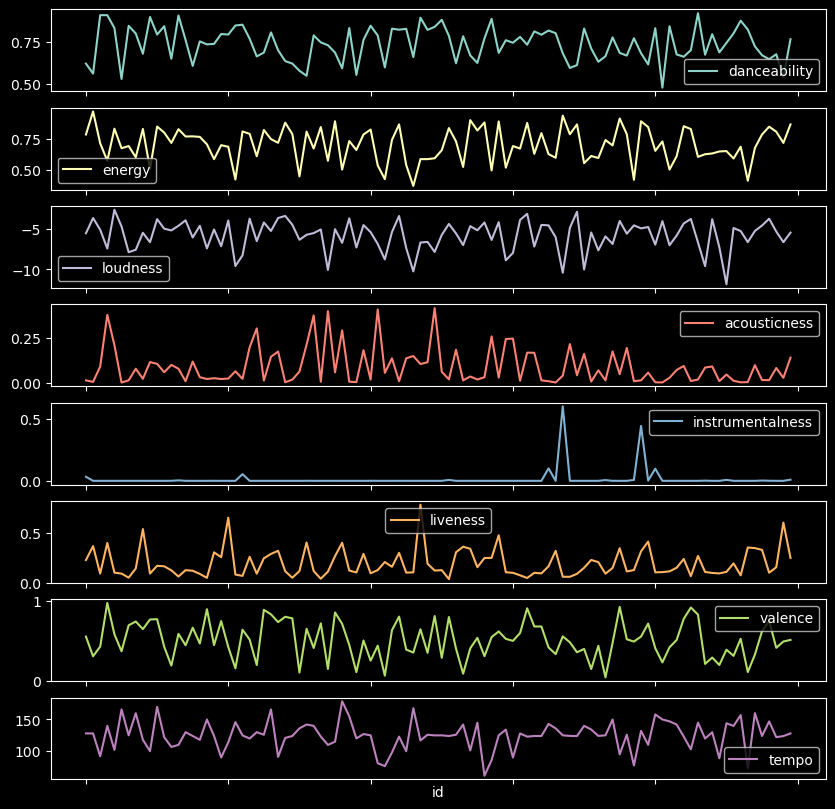

In [52]:
# subplots on dark background for each of the Audio features we left for our analysis
result_key_drop.plot(subplots = True, figsize = (10,10))
plt.style.use('dark_background')
# in the following illustration we can notice how random order leads to a possible mismatch with our expectations 
# of a playlist  
# which can disrupt the purpose of a playlist

# since there ary too many song ids, we are naming the x asis "id" without showing individual song ids
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.show()


## Filtering by some criteria

In [53]:
df = result_key_drop

In [54]:
df.shape

(100, 8)

In [55]:
df.columns

Index(['danceability', 'energy', 'loudness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

In [56]:
df.index

Index(['2tTmW7RDtMQtBk7m2rYeSw', '4uUG5RXrOk84mYEfFvj3cK',
       '6Sq7ltF9Qa7SNFBsV5Cogx', '3LtpKP5abr2qqjunvjlX5i',
       '79HZAZNnOE97rb2hnI0XQr', '3F5CgOj3wFlRv51JsHbxhe',
       '4zN21mbAuaD0WqtmaTZZeP', '0hquQWY3xvYqN4qtiquniF',
       '5QO79kh1waicV47BqGRL3g', '27ZZdyTSQWI7Cug2d2PkqV',
       '6DoL1yYIwEW7VZMRaJhoJI', '7fZBQnc0zXwVybgCIrQQil',
       '1IHWl5LamUGEuP4ozKQSXZ', '6wtZPYBIXUvCpXwVjMCJBf',
       '5fwSHlTEWpluwOM0Sxnh5k', '3rb0tMq42WfggucPm0HHkA',
       '18asYwWugKjjsihZ0YvRxO', '27NovPIUIRrOZoCHxABJwK',
       '1bgKMxPQU7JIZEhNsM1vFs', '0skYUMpS0AcbpjcGsAbRGj',
       '41oY4WCTj5kccfesTVFnvN', '2BcMwX1MPV6ZHP4tUT9uq6',
       '20on25jryn53hWghthWWW3', '0bI7K9Becu2dtXK1Q3cZNB',
       '3Vi5XqYrmQgOYBajMWSvCi', '7MIhUdNJtaOnDmC5nBC1fb',
       '7FIWs0pqAYbP91WWM0vlTQ', '4jPy3l0RUwlUI9T5XHBW2m',
       '63WuQOXohQIxOxIFA2K7bR', '1RF02Cf80mTaeNXG2P2boR',
       '65OVbaJR5O1RmwOQx0875b', '79s5XnCN4TJKTVMSmOx8Ep',
       '0fX4oNGBWO3dSGUZcVdVV2', '3Z7CaxQkqbIs1rewKi6v4W

In [57]:
# filtering out instrumentals
no_instrumentals = df[df['instrumentalness'].between(0, 0.5)]
no_instrumentals.shape
df = no_instrumentals

In [58]:

# filter out songs that vary in loudness too much from the mean / median
# Spotify also has an option "Settings >>> Playback >>> Enable Audio Normalisation" but for a practice let's filter it:
median_loudness = np.median(df['loudness']) 
ld = df[abs(df['loudness'] - median_loudness) < 2]
ld.shape

(80, 8)

In [59]:
df = ld 

In [60]:
# additionall arguments to make the Spotify Playlist shorter and more compatible with our preferences
# you can select which ever you want to adjust
ld = df[(df[ 'valence' ] > 0.2) & (df[ 'energy' ] > 0.3) & (df[ 'danceability' ] > 0.6)]
ld.shape
# we reduced the playlist -> now it is well structured and a perfect size!

(64, 8)

In [61]:
df = ld 
# additionaly reorder by some criteria to create custom filted private playlist
df = df.sort_values(by=['tempo'], ascending=False)


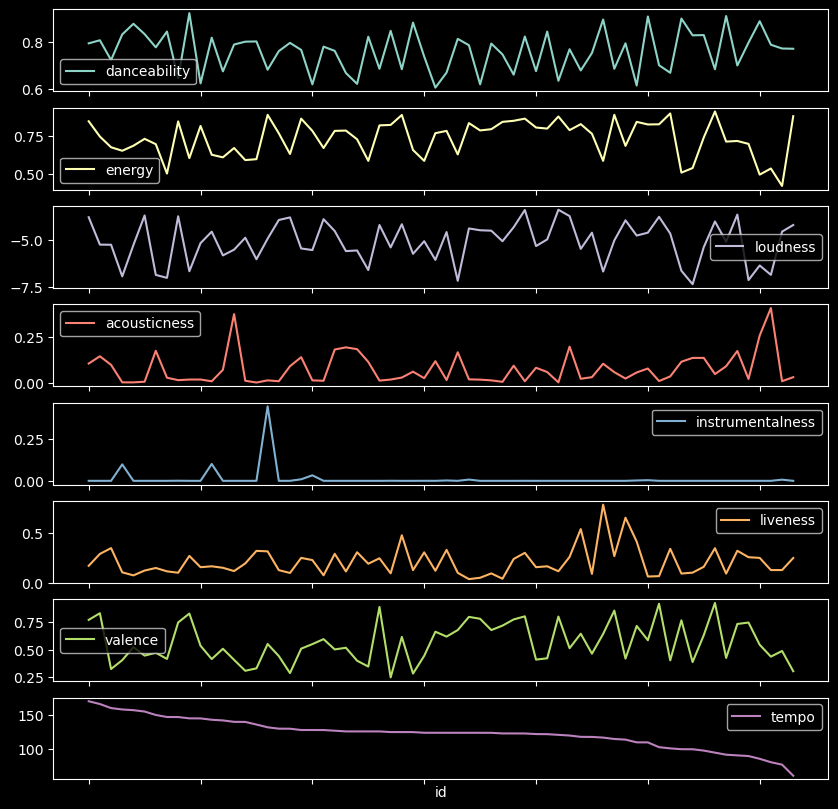

In [62]:
df.plot(subplots = True, figsize = (10,10))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=True,      # ticks along the bottom edge are on
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.show()


In [65]:
# create private playlist from filtered out playlist
user = '31fhllglp2yvdfhn4pbukg2of4cu'
scope = "playlist-modify-private"
redirect_uri = 'http://localhost:5000/callback'
sp = spotipy.Spotify(auth_manager=SpotifyOAuth(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    scope=scope,
    redirect_uri=redirect_uri))
playlist = sp.user_playlist_create(user, name='My workout playlist', public=False)

In [66]:
playlist

{'collaborative': False,
 'description': None,
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/5dNprTzBRHyZeHfttAaoDQ'},
 'followers': {'href': None, 'total': 0},
 'href': 'https://api.spotify.com/v1/playlists/5dNprTzBRHyZeHfttAaoDQ',
 'id': '5dNprTzBRHyZeHfttAaoDQ',
 'images': [],
 'name': 'My workout playlist',
 'owner': {'display_name': 'Dominikvukusic',
  'external_urls': {'spotify': 'https://open.spotify.com/user/31fhllglp2yvdfhn4pbukg2of4cu'},
  'href': 'https://api.spotify.com/v1/users/31fhllglp2yvdfhn4pbukg2of4cu',
  'id': '31fhllglp2yvdfhn4pbukg2of4cu',
  'type': 'user',
  'uri': 'spotify:user:31fhllglp2yvdfhn4pbukg2of4cu'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'MSw1NjViMzZiZDRkYzM0YjZjOTQzNjIxMjczNTAyZDk4YWU5NzRjYjlh',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/5dNprTzBRHyZeHfttAaoDQ/tracks',
  'items': [],
  'limit': 100,
  'next': None,
  'offset': 0,
  'previous': None,
  'total': 0},
 'type': 'playlist',
 'uri': 'spotif

In [67]:
sp.playlist_add_items(playlist['id'], list(df.index.array)) 
# open your app -> your list is ready!

{'snapshot_id': 'MixhMDQyNDg4MzdiNWNkOGNhNmE5NGU0MGRhNzI5NTEzYmE4OWM5NGNk'}

# Congratulations! Enjoy the new Playlist! 


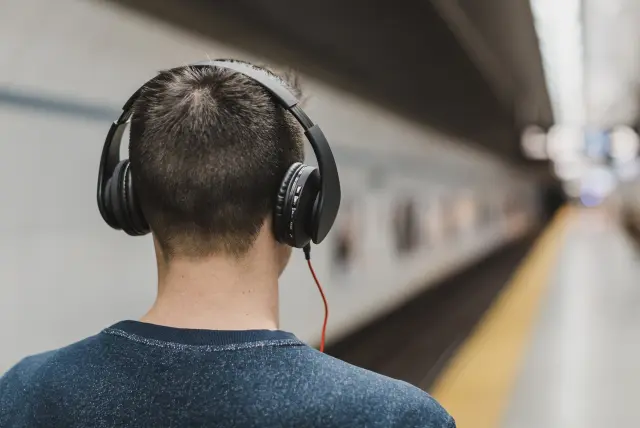